# Predicting Bulldozer Sales Price

In this notebook, we will explore a dataset and build machine learning models to predict the auction sale price of bulldozers ðŸšœ. This idea and data were taken from this [Kaggle Competition](https://www.kaggle.com/c/bluebook-for-bulldozers/).

## 1. Problem definition

The company Fast Iron is creating a "blue book for bulldozer", which aims to inform their customers about what the company's heavy equipment is worth at auction. They need a model to predict this price, based on usage, equipment type and configuration.

## 2. Data

As mentioned before, the data was taken from [Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/).

There are 3 main datasets:

- **Train.csv:** Training set, which contains data through the end of 2011.
- **Valid.csv:** Validation set, which contains data from January 1, 2012 - April 30, 2012.
- **Test.csv:** Test set, which contains data from May 1, 2012 - November 2012.

Key fields:

- SalesID: Unique identifier of the sale.
- MachineID: Unique identifier of a machine. One machine can be sold multiple times.
- saleprice: What the machine sold for at auction.
- saledate: Date of the sale.

## 3. Evaluation

The key evaluation metric will be the Root Mean Squared Log Error (RMSLE), between the actual and predicted auction prices. As for most regression models, the goal is to minimize the error of the prediction, when compared to the actual value. 

## 4. Features and EDA

| Variable                 	| Description                                                                                                                                                                                                                     	|
|--------------------------	|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| SalesID                  	|   unique identifier of a particular sale of a machine at auction                                                                                                                                                                	|
| MachineID                	|   identifier for a particular machine;  machines may have multiple sales                                                                                                                                                        	|
| ModelID                  	|   identifier for a unique machine model (i.e. fiModelDesc)                                                                                                                                                                      	|
| datasource               	|   source of the sale record;  some sources are more diligent about reporting attributes of the machine than others.  Note that a particular datasource may report on multiple auctioneerIDs.                                    	|
| auctioneerID             	|   identifier of a particular auctioneer, i.e. company that sold the machine at auction.  Not the same as datasource.                                                                                                            	|
| YearMade                 	|   year of manufacturer of the Machine                                                                                                                                                                                           	|
| MachineHoursCurrentMeter 	|   current usage of the machine in hours at time of sale (saledate);  null or 0 means no hours have been reported for that sale                                                                                                  	|
| UsageBand                	|   value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel;  e.g. 'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel. 	|
| Saledate                 	|   time of sale                                                                                                                                                                                                                  	|
| Saleprice                	|   cost of sale in USD                                                                                                                                                                                                           	|
| fiModelDesc              	|   Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor                                                                                       	|
| fiBaseModel              	|   disaggregation of fiModelDesc                                                                                                                                                                                                 	|
| fiSecondaryDesc          	|   disaggregation of fiModelDesc                                                                                                                                                                                                 	|
| fiModelSeries            	|   disaggregation of fiModelDesc                                                                                                                                                                                                 	|
| fiModelDescriptor        	|   disaggregation of fiModelDesc                                                                                                                                                                                                 	|
| ProductSize              	| The size class grouping for a product group. Subsets within product group.                                                                                                                                                      	|
| ProductClassDesc         	|   description of 2nd level hierarchical grouping (below ProductGroup) of fiModelDesc                                                                                                                                            	|
| State                    	|   US State in which sale occurred                                                                                                                                                                                               	|
| ProductGroup             	|   identifier for top-level hierarchical grouping of fiModelDesc                                                                                                                                                                 	|
| ProductGroupDesc         	|   description of top-level hierarchical grouping of fiModelDesc                                                                                                                                                                 	|
| Drive_System             	| machine configuration;  typcially describes whether 2 or 4 wheel drive                                                                                                                                                          	|
| Enclosure                	| machine configuration - does machine have an enclosed cab or not                                                                                                                                                                	|
| Forks                    	| machine configuration - attachment used for lifting                                                                                                                                                                             	|
| Pad_Type                 	| machine configuration - type of treads a crawler machine uses                                                                                                                                                                   	|
| Ride_Control             	| machine configuration - optional feature on loaders to make the ride smoother                                                                                                                                                   	|
| Stick                    	| machine configuration - type of control                                                                                                                                                                                         	|
| Transmission             	| machine configuration - describes type of transmission;  typically automatic or manual                                                                                                                                          	|
| Turbocharged             	| machine configuration - engine naturally aspirated or turbocharged                                                                                                                                                              	|
| Blade_Extension          	| machine configuration - extension of standard blade                                                                                                                                                                             	|
| Blade_Width              	| machine configuration - width of blade                                                                                                                                                                                          	|
| Enclosure_Type           	| machine configuration - does machine have an enclosed cab or not                                                                                                                                                                	|
| Engine_Horsepower        	| machine configuration - engine horsepower rating                                                                                                                                                                                	|
| Hydraulics               	| machine configuration - type of hydraulics                                                                                                                                                                                      	|
| Pushblock                	| machine configuration - option                                                                                                                                                                                                  	|
| Ripper                   	| machine configuration - implement attached to machine to till soil                                                                                                                                                              	|
| Scarifier                	| machine configuration - implement attached to machine to condition soil                                                                                                                                                         	|
| Tip_control              	| machine configuration - type of blade control                                                                                                                                                                                   	|
| Tire_Size                	| machine configuration - size of primary tires                                                                                                                                                                                   	|
| Coupler                  	| machine configuration - type of implement interface                                                                                                                                                                             	|
| Coupler_System           	| machine configuration - type of implement interface                                                                                                                                                                             	|
| Grouser_Tracks           	| machine configuration - describes ground contact interface                                                                                                                                                                      	|
| Hydraulics_Flow          	| machine configuration - normal or high flow hydraulic system                                                                                                                                                                    	|
| Track_Type               	| machine configuration - type of treads a crawler machine uses                                                                                                                                                                   	|
| Undercarriage_Pad_Width  	| machine configuration - width of crawler treads                                                                                                                                                                                 	|
| Stick_Length             	| machine configuration - length of machine digging implement                                                                                                                                                                     	|
| Thumb                    	| machine configuration - attachment used for grabbing                                                                                                                                                                            	|
| Pattern_Changer          	| machine configuration - can adjust the operator control configuration to suit the user                                                                                                                                          	|
| Grouser_Type             	| machine configuration - type of treads a crawler machine uses                                                                                                                                                                   	|
| Backhoe_Mounting         	| machine configuration - optional interface used to add a backhoe attachment                                                                                                                                                     	|
| Blade_Type               	| machine configuration - describes type of blade                                                                                                                                                                                 	|
| Travel_Controls          	| machine configuration - describes operator control configuration                                                                                                                                                                	|
| Differential_Type        	| machine configuration - differential type, typically locking or standard                                                                                                                                                        	|
| Steering_Controls        	| machine configuration - describes operator control configuration                                                                                                                                                                	|

### Import tools and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import training and validations sets
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',
                 low_memory=False)

### Begin Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
# Missing values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

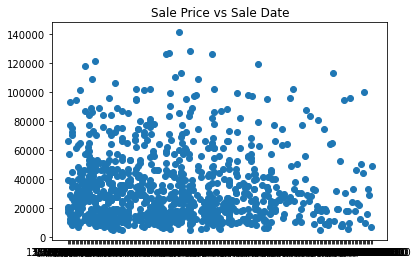

In [5]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);
ax.set(title="Sale Price vs Sale Date");

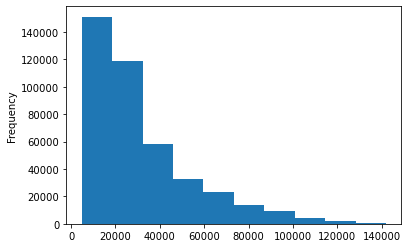

In [6]:
df['SalePrice'].plot.hist();

In [7]:
df['saledate'][:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

### Parsing dates

For time series data, we need to convert the dates from type Object to Date.

In [8]:
# Import data again, but parsign dates
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',
                 low_memory=False,
                 parse_dates=['saledate'])
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

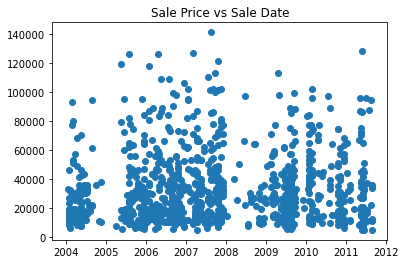

In [9]:
# If we plot again, data will be clearer
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);
ax.set(title="Sale Price vs Sale Date");

In [10]:
df.head().T # Transpose so we can see all features.

0  \
SalesID                                                    1139246   
SalePrice                                                    66000   
MachineID                                                   999089   
ModelID                                                       3157   
datasource                                                     121   
auctioneerID                                                     3   
YearMade                                                      2004   
MachineHoursCurrentMeter                                        68   
UsageBand                                                      Low   
saledate                                       2006-11-16 00:00:00   
fiModelDesc                                                   521D   
fiBaseModel                                                    521   
fiSecondaryDesc                                                  D   
fiModelSeries                                                  NaN   
fiModelDescriptor                                              NaN   
ProductSize                                                    NaN   
fiProductClassDesc        Wheel Loader - 110.0 to 120.0 Horsepower   
state                                                      Alabama   
ProductGroup                                                    WL   
ProductGroupDesc                                      Wheel Loader   
Drive_System                                                   NaN   
Enclosure                                               EROPS w AC   
Forks                                          None or Unspecified   
Pad_Type                                                       NaN   
Ride_Control                                   None or Unspecified   
Stick                                                          NaN   
Transmission                                                   NaN   
Turbocharged                                                   NaN   
Blade_Extension                                                NaN   
Blade_Width                                                    NaN   
Enclosure_Type                                                 NaN   
Engine_Horsepower                                              NaN   
Hydraulics                                                 2 Valve   
Pushblock                                                      NaN   
Ripper                                                         NaN   
Scarifier                                                      NaN   
Tip_Control                                                    NaN   
Tire_Size                                      None or Unspecified   
Coupler                                        None or Unspecified   
Coupler_System                                                 NaN   
Grouser_Tracks                                                 NaN   
Hydraulics_Flow                                                NaN   
Track_Type                                                     NaN   
Undercarriage_Pad_Width                                        NaN   
Stick_Length                                                   NaN   
Thumb                                                          NaN   
Pattern_Changer                                                NaN   
Grouser_Type                                                   NaN   
Backhoe_Mounting                                               NaN   
Blade_Type                                                     NaN   
Travel_Controls                                                NaN   
Differential_Type                                         Standard   
Steering_Controls                                     Conventional   

                                                                 1  \
SalesID                                                    1139248   
SalePrice                                                    57000   
MachineID                                                   117657   
Mode

In [11]:
df['saledate'].head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort Dataframe by saledate

Since we're working with time series data, let's sort by sale date.

In [12]:
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df['saledate'].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

Let's keep the original dataset and work over an exact copy of it.

In [13]:
df_tmp = df.copy()

### Add datetime parameters for `saledate` column

In [14]:
df_tmp['saleYear'] = df_tmp['saledate'].dt.year
df_tmp['saleMonth'] = df_tmp['saledate'].dt.month
df_tmp['saleDay'] = df_tmp['saledate'].dt.day
df_tmp['saleDayOfWeek'] = df_tmp['saledate'].dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp['saledate'].dt.dayofyear

# We can remove saledate
df_tmp.drop('saledate', axis=1, inplace=True)

In [15]:
df_tmp.head().T

205615  \
SalesID                                                             1646770   
SalePrice                                                              9500   
MachineID                                                           1126363   
ModelID                                                                8434   
datasource                                                              132   
auctioneerID                                                             18   
YearMade                                                               1974   
MachineHoursCurrentMeter                                                NaN   
UsageBand                                                               NaN   
fiModelDesc                                                            TD20   
fiBaseModel                                                            TD20   
fiSecondaryDesc                                                         NaN   
fiModelSeries                                                           NaN   
fiModelDescriptor                                                       NaN   
ProductSize                                                          Medium   
fiProductClassDesc        Track Type Tractor, Dozer - 105.0 to 130.0 Hor...   
state                                                                 Texas   
ProductGroup                                                            TTT   
ProductGroupDesc                                        Track Type Tractors   
Drive_System                                                            NaN   
Enclosure                                                             OROPS   
Forks                                                                   NaN   
Pad_Type                                                                NaN   
Ride_Control                                                            NaN   
Stick                                                                   NaN   
Transmission                                                   Direct Drive   
Turbocharged                                                            NaN   
Blade_Extension                                                         NaN   
Blade_Width                                                             NaN   
Enclosure_Type                                                          NaN   
Engine_Horsepower                                                       NaN   
Hydraulics                                                          2 Valve   
Pushblock                                                               NaN   
Ripper                                                  None or Unspecified   
Scarifier                                                               NaN   
Tip_Control                                                             NaN   
Tire_Size                                                               NaN   
Coupler                                                                 NaN   
Coupler_System                                                          NaN   
Grouser_Tracks                                                          NaN   
Hydraulics_Flow                                                         NaN   
Track_Type                                                              NaN   
Undercarriage_Pad_Width                                                 NaN   
Stick_Length                                                            NaN   
Thumb                                                                   NaN   
Pattern_Changer                                                         NaN   
Grouser_Type                                                            NaN   
Backhoe_Mounting                                        None or Unspecified   
Blade_Type                                                         Straight   
Travel_Controls                                         None or Unspecified   
Differential_Type                       

In [16]:
# States with the most sales
df_tmp['state'].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling

Since we have way too many features, let's better start doing some model-driven EDA

We're gonna need to convert all features to number

In [17]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

We will also have to handle missing data

In [18]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Converting strings to categories

In [19]:
# Find the columns which contain strings and convert them to ordered categories
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [20]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [21]:
df_tmp['state'].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [22]:
df_tmp['state'].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Now have a way to access all the features in the form of numbers. 

The next step is to take care of the missing data. Let's see the percentage of record with missing data for each feature.

In [23]:
df_tmp.isnull().sum()/len(df_tmp)*100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

Let's save the preprocessed data to a new file

In [24]:
# Export to csv
df_tmp.to_csv('data/bluebook-for-bulldozers/processed-data/train_tmp.csv',
              index=False)

### Fill missing values

First, let's create a function that takes a dataframe and a list of factor names and print how many and which ones has missing values. It also returns an array with the found factors if there are at least one.

In [35]:
def find_missing_values(df, list_of_factors):
    missing = []
    
    for label, content in df[list_of_factors].items():
        if pd.isnull(content).sum():
            missing.append(label)
    
    print(f"There are {len(missing)} columns with missing values{':'+ chr(10) if len(missing) else '.'}")
    for el in missing:
        print(el)
        
    return missing if len(missing) > 0 else None

#### Numeric missing values

In [38]:
# Print numerical factors
numerical = []
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)
        numerical.append(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear
auctioneerID_is_missing
MachineHoursCurrentMeter_is_missing


In [29]:
# Now let's find out which of them have missing values
missing = find_missing_values(df_tmp, numerical)

There are 2 missing values:

auctioneerID
MachineHoursCurrentMeter


Let's fill the with the median, since mean is too sensitive to outliers.

In [31]:
for label, content in df_tmp[missing].items():
    
    # Add a binary column that indicates if data was missing
    df_tmp[f'{label}_is_missing'] = pd.isnull(content)

    # Fill missing values with the median
    df_tmp[label] = content.fillna(content.median())

In [36]:
# Let's check if there's no null numeric values anymore
find_missing_values(df_tmp, numerical)

There are 0 columns with missing values.


In [37]:
# Check how many examples were missing
df_tmp['auctioneerID_is_missing'].value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [39]:
df_tmp['auctioneerID_is_missing'].isna().sum()

0

#### Categorical missing values

In [40]:
# Check for columns which are not numeric
categorical = []

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        categorical.append(label)
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [43]:
pd.Categorical(df_tmp['state']).dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
                 ordered=True)

We have a numerical representation of these in the codes properties

In [44]:
pd.Categorical(df_tmp['state']).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

Let's find the categorical factors with missing values

In [45]:
cat_missing = find_missing_values(df_tmp, categorical)

There are 38 columns with missing values:

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [46]:
for label, content in df_tmp[cat_missing].items():
    
    # Add a binary column that indicates if data was missing
    df_tmp[f'{label}_is_missing'] = pd.isnull(content)

    # Turn categories into numbers and add 1 (to turn missing into 0 insted of -1)
    df_tmp[label] = pd.Categorical(content).codes + 1

In [47]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 97, dtype: int64